In [47]:
%load_ext autoreload
%autoreload 2
import json
import os
import matplotlib.pyplot as plt
import tqdm.notebook as tqdm
import networkx as nx
import time
import random
from game_util import Game

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
json_root = os.path.join("reddit_reply_networks", "reply_networks")
json_files = [os.path.join(json_root, f) for f in os.listdir(json_root)]


combined_edges = []

print("Starting to process dictionaries and gather edges...")
start_time_processing = time.time()


with open(os.path.join(json_root, "politics.json"), "r") as f:
    data_dict = json.load(f)
data_dict = data_dict[0]
for source_node, target_nodes in data_dict.items():
    for target_node in target_nodes:
        combined_edges.append((source_node, target_node))

processing_time = time.time() - start_time_processing
print(
    f"Time taken to process dictionaries and create edge list: {processing_time:.4f} seconds"
)
print(f"Total number of edges collected: {len(combined_edges)}")

print("\nCreating graph from combined edge list using NetworkX...")
start_time_graph_creation = time.time()

graph = nx.DiGraph()
graph.add_edges_from(combined_edges)

graph_creation_time = time.time() - start_time_graph_creation
print(f"Time taken for NetworkX graph creation: {graph_creation_time:.4f} seconds")
print(f"Number of nodes in the graph: {graph.number_of_nodes()}")
print(f"Number of edges in the graph: {graph.number_of_edges()}")
graph = graph.to_undirected()
pos = nx.random_layout(graph, seed=42)
graph.remove_edges_from(nx.selfloop_edges(graph))
degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
average_degree = sum(degree_sequence) / len(degree_sequence) if degree_sequence else 0
print(f"Average degree of the graph: {average_degree:.4f}")

Starting to process dictionaries and gather edges...
Time taken to process dictionaries and create edge list: 0.4220 seconds
Total number of edges collected: 98372

Creating graph from combined edge list using NetworkX...
Time taken for NetworkX graph creation: 0.2909 seconds
Number of nodes in the graph: 26378
Number of edges in the graph: 98372
Average degree of the graph: 5.7424


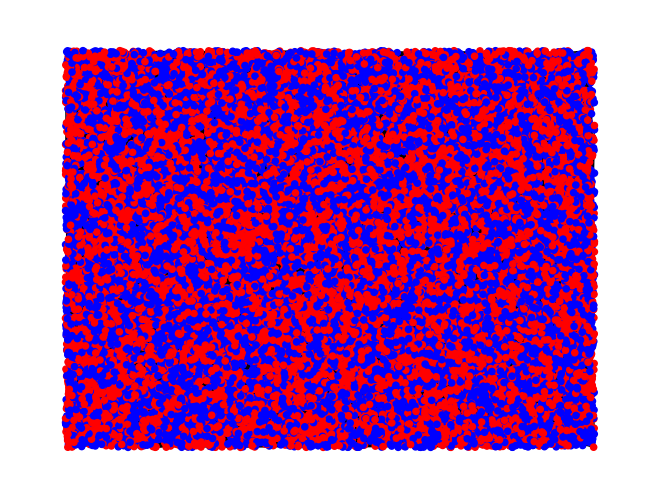

100%|██████████| 100/100 [00:21<00:00,  4.65it/s]


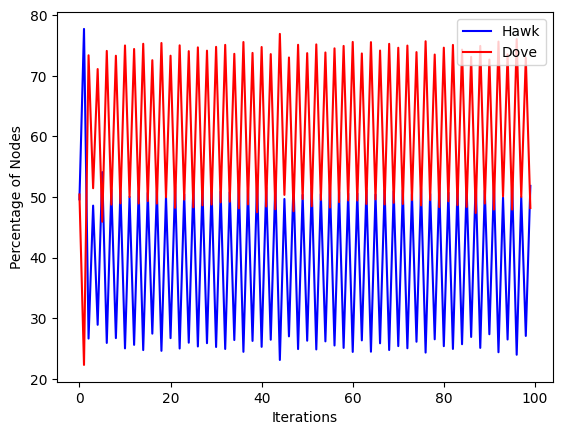

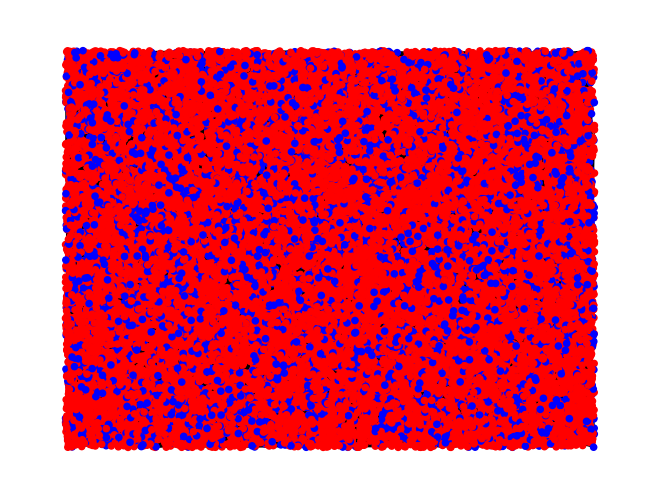

In [54]:
prisoners_dilemma = {
    "cooperate": {
        "cooperate": (3, 3),
        "defect": (0, 5),
    },
    "defect": {
        "cooperate": (5, 0),
        "defect": (1, 1),
    },
}

hawk_dove = {
    "hawk": {
        "hawk": (0, 0),
        "dove": (3, 1),
    },
    "dove": {
        "hawk": (1, 3),
        "dove": (2, 2),
    },
}

game = Game(graph, hawk_dove, pos=pos)
game.reset_graph()
game.visualize_graph()
counters = game.play_iter(100, plot=True)

100%|██████████| 100/100 [00:21<00:00,  4.59it/s]


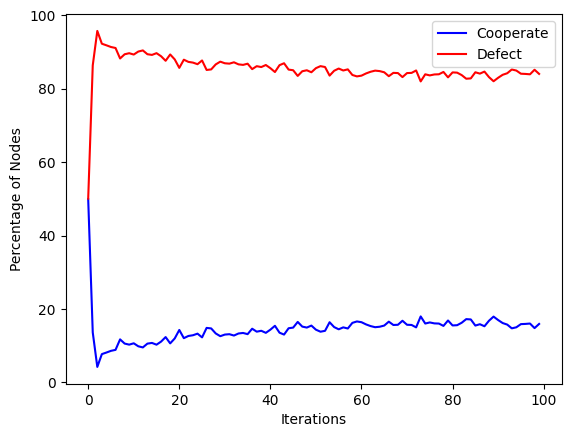

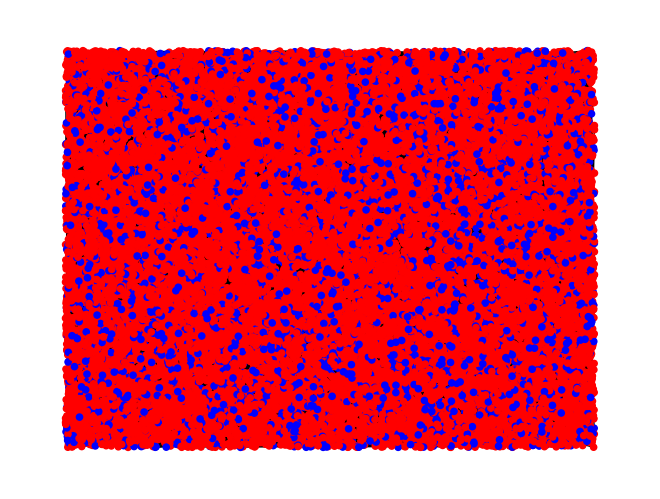

In [55]:
game = Game(graph, prisoners_dilemma, pos=pos)
game.reset_graph()
counters = game.play_iter(100, plot=True)